#### Obsługa brakujących danych

-  <span style="color:green;">Podział danych na zestaw treningowy i testowy.</span>


#### Budowa Modelu

- Wybór modelu do przetestowania (np. regresja liniowa, las losowy).
- Trenowanie modelu na danych treningowych.
- Walidacja modelu na danych testowych.

#### Ewaluacja Modelu

- Ocena wydajności modelu za pomocą odpowiednich metryk (np. R-squared, MSE).

#### Importy

In [151]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Analiza danych

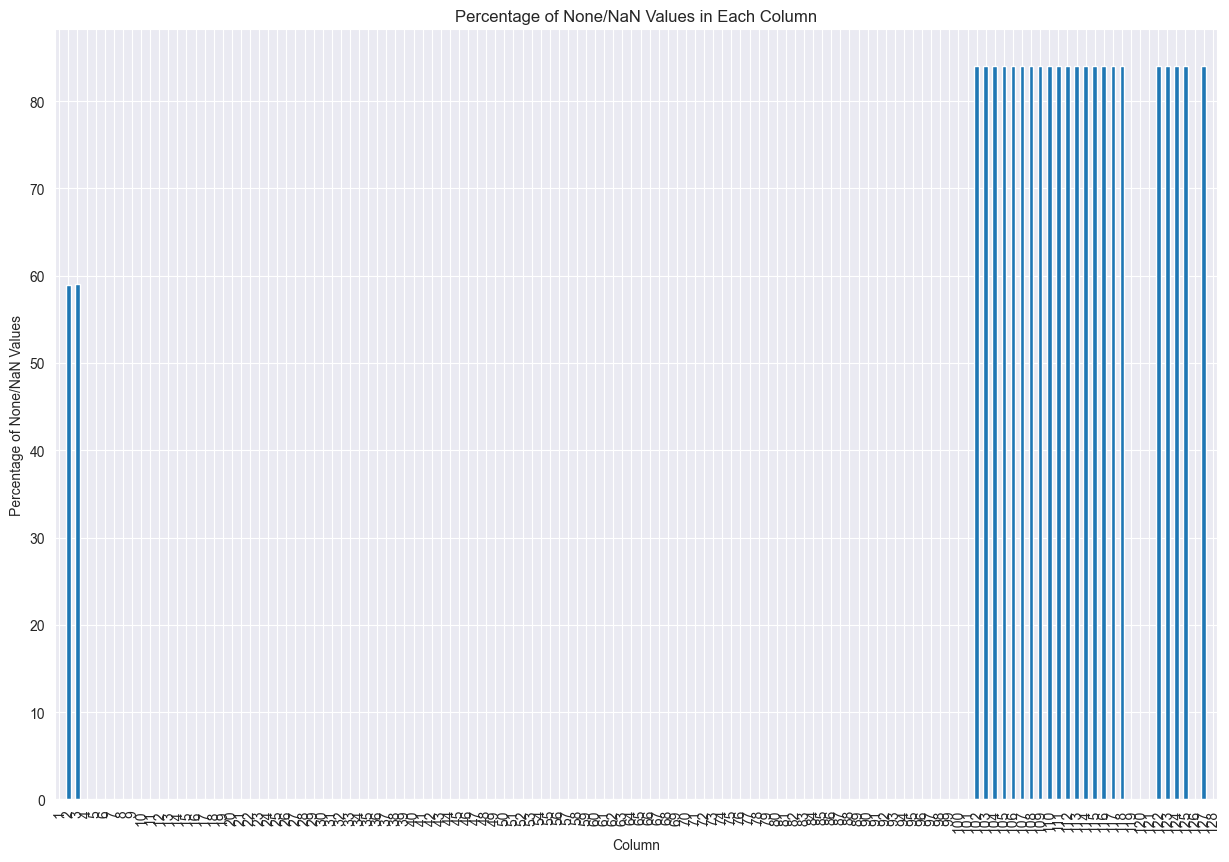

In [152]:
# Wczytywanie danych
file_path = 'communities.data'
column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack',
    'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban',
    'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
    'medFamInc',
    'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
    'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
    'PctEmplManu',
    'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
    'FemalePctDiv',
    'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
    'PctWorkMomYoungKids',
    'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
    'PctImmigRec10',
    'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly',
    'PctNotSpeakEnglWell',
    'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
    'PctHousOwnOcc',
    'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb',
    'OwnOccLowQuart',
    'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc',
    'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctBornSameState',
    'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop',
    'LemasSwFTFieldOps',
    'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
    'PctPolicMinor',
    'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
    'PolicCars',
    'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop',
    'ViolentCrimesPerPop'
]

data = pd.read_csv(file_path, names=column_names)

# Konwersja '?' na NaN dla prawidłowego obsłużenia brakujących danych
data.replace('?', pd.NA, inplace=True)

# Brakujące dane
none_frequency = data.isna().mean() * 100

plt.figure(figsize=(15, 10))
none_frequency.plot(kind='bar')
plt.title('Percentage of None/NaN Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Percentage of None/NaN Values')
plt.xticks(range(len(none_frequency)), [str(i + 1) for i in range(len(none_frequency))], rotation=90)
plt.show()

#### Przygotowanie danych

In [153]:
# Usunięcie kolumny 'communityname'
data = data.drop('communityname', axis=1)

# Zamiana na numeryczne
data = data.apply(pd.to_numeric, errors='coerce')

# Usuwanie kolumn z dużą ilością brakujących danych
threshold_for_missing_data = 0.5
missing_values = data.isna().sum()
columns_to_drop = missing_values[missing_values > len(data) * threshold_for_missing_data].index
data_cleaned = data.drop(columns=columns_to_drop)

# Wypisz kolumny do wyrzucenia
dropped_columns = columns_to_drop.tolist()
print(f'Dropped columns: communityname, {dropped_columns}')
print(f'Numbers of dropped columns: {len(dropped_columns) + 1}')

# # Usuwanie kolumny 'communityname'
y = data_cleaned['ViolentCrimesPerPop']
X = data_cleaned.drop('ViolentCrimesPerPop', axis=1)
# 
# # Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Dropped columns: communityname, ['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
Numbers of dropped columns: 25


#### Regresja liniowa - Próba modelu

In [154]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Błąd średniokwadratowy (MSE):", mse)
print("Współczynnik determinacji (R^2):", r2)

Błąd średniokwadratowy (MSE): 0.016964903579527367
Współczynnik determinacji (R^2): 0.6511023781783281
